## LSST Visits in Interval

testing VisitsInIntervalMetric

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots 

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = False

### VisitsInIntervalMetric

In [3]:
from mafContrib import VisitsInIntervalMetric

In [4]:
# Pick a slicer
slicer = slicers.HealpixSlicer(nside=16)

summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75), metrics.CountMetric()]
# Configure some metrics
metricList = []
m0 = VisitsInIntervalMetric(45, 3, nPairs=0, minPairGap=0.) # no pair gap
m1 = VisitsInIntervalMetric(45, 3, nPairs=2, minPairGap=2.) # at least two pairs separated by 2 days
m2 = VisitsInIntervalMetric(45, 5, nPairs=2, minPairGap=2.) # require five total visits with at least two pairs separated by 2 days

metricList.append(m0)
metricList.append(m1)
metricList.append(m2)


# suppress angular power spectrum plots
plotFuncs = [plots.HealpixSkyMap(), plots.HealpixHistogram()]

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


In [10]:
# Set the database and query
runName = 'minion_1016'
#year=8
#sqlconstraint = 'night between %f and %f' % ((365.25*year,365.25*(year+1)))
sqlconstraint = ''

bDict={}
for i,metric in enumerate(metricList):
    bDict[i] = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                          runName=runName, summaryMetrics=summaryMetrics,  plotFuncs=plotFuncs)

Querying database with no constraint.
Found 2447931 visits
Running:  [0, 1, 2]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  constraint now.
Plotting complete.


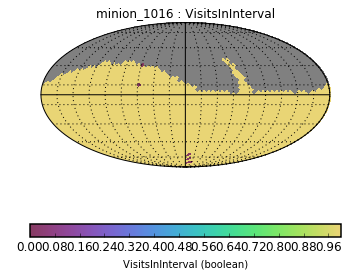

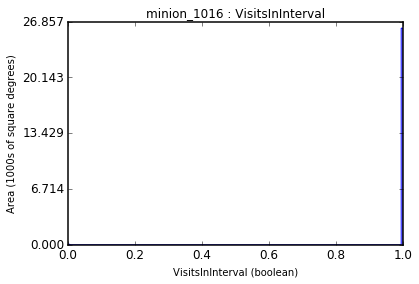

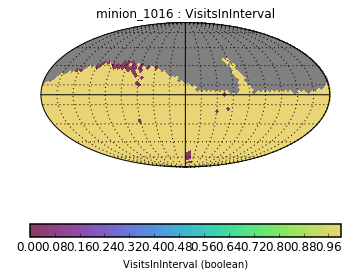

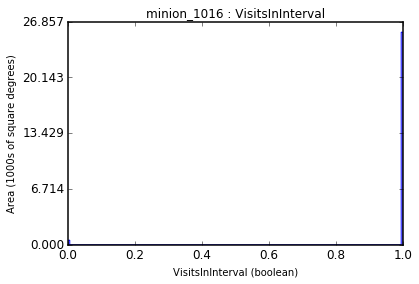

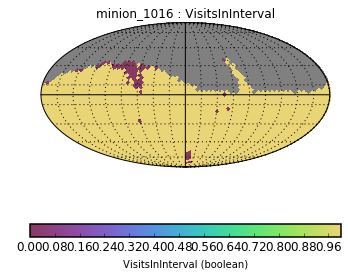

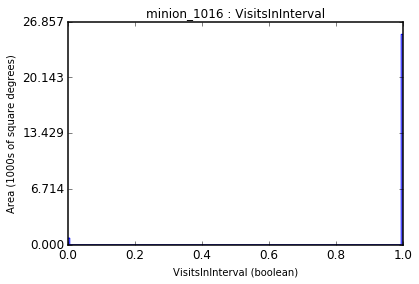

In [11]:
opsdb = db.OpsimDatabase(runName + '_sqlite.db')
outDir = 'VisitsInInterval'
resultsDb = db.ResultsDb(outDir=outDir)

bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [12]:
for key in bDict:
    bDict[key].computeSummaryStats(resultsDb=resultsDb)
    print bDict[key].metric.name, bDict[key].summaryValues

VisitsInInterval {'25th%ile': 1.0, 'Rms': 0.05062382240588012, '75th%ile': 1.0, 'Min': 0.0, 'Max': 1.0, 'Median': 1.0, 'Count': 1946, 'Mean': 0.99743062692702977}
VisitsInInterval {'25th%ile': 1.0, 'Rms': 0.14361393515406318, '75th%ile': 1.0, 'Min': 0.0, 'Max': 1.0, 'Median': 1.0, 'Count': 1946, 'Mean': 0.97893114080164445}
VisitsInInterval {'25th%ile': 1.0, 'Rms': 0.17286363193383197, '75th%ile': 1.0, 'Min': 0.0, 'Max': 1.0, 'Median': 1.0, 'Count': 1946, 'Mean': 0.96916752312435761}


In [9]:
1342*hp.nside2pixarea(16,degrees=True)

18021.313149974172

In [13]:
1946*hp.nside2pixarea(16,degrees=True)

26132.246937294887